# **Covid-19 X-Ray Image Classification**

In this notebook we will traina deep convolutional neural network to classify x-ray images from [Covid-19 x-ray imag dataset with huge samples](https://www.kaggle.com/mr3suvhro/covid-19-xray-image-dataset-with-huge-samples) which i got from kaggle datsets with around `96%` accuracy. 

Here are some images of the dataset.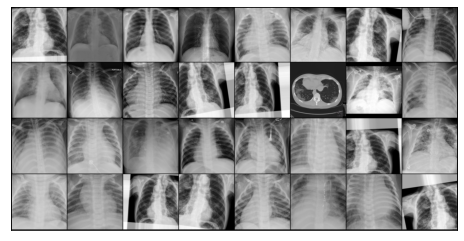

In [2]:
!pip install jovian --upgrade --quiet

In [3]:
import jovian

In [4]:
# Execute this to save new versions of the notebook
jovian.commit(project="covid-19-x-ray-image-classification")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/navyasrikelam1/covid-19-x-ray-image-classification


'https://jovian.ai/navyasrikelam1/covid-19-x-ray-image-classification'

Let's begin by installing and importing the required libraries.



 

In [5]:
import os
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader 
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'


## **Downloading the dataset**
Datasets can be downloaded within a Jupyter notebook or Python script using the `opendatasets.download` helper function. `Opendatasets` is a Python library for downloading datasets from online sources like [Kaggle](https://www.kaggle.com/datasets) and Google Drive using a simple Python command.

#### **Installation of opendatasets library**

> Install the library using pip:

In [6]:
!pip install opendatasets --upgrade --quiet

In [8]:
import opendatasets as od

od.download("https://www.kaggle.com/mr3suvhro/covid-19-xray-image-dataset-with-huge-samples")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: navyasrikelam
Your Kaggle Key: ··········


  1%|          | 5.00M/478M [00:00<00:12, 38.6MB/s]

100%|██████████| 478M/478M [00:04<00:00, 107MB/s]


In [9]:
data_dir = './covid-19-xray-image-dataset-with-huge-samples/COVID'

print(os.listdir(data_dir)) 

['test', 'train']


In [10]:
classes = os.listdir(data_dir + '/train')
print(classes)

['Covid Negative', 'Covid Positive']


In [11]:
covid_positive_files = os.listdir(data_dir + '/train/Covid Positive')
print('Total number of covid positive files : ', len(covid_positive_files))

Total number of covid positive files :  1000


> The dataset has total of 2000 train samples with 1000 each of `covid_positive_files` and `covid_negative_files`. And the dataset contains 328 test samples with 164 each of covid positive and negative x ray images.

In [12]:
covid_negative_files = os.listdir(data_dir + '/train/Covid Negative')
print('Total number of covid negative files : ', len(covid_negative_files))

Total number of covid negative files :  1000


In [13]:
covid_positive_test_files = os.listdir(data_dir + '/test/Covid Positive' )
print('Total number covid positive test files : ', len(covid_positive_test_files))

covid_negative_test_files = os.listdir(data_dir + '/test/Covid Negative')
print('Total number covid positive test files : ', len(covid_negative_test_files))


Total number covid positive test files :  164
Total number covid positive test files :  164


##### To load the datatset as pytorch tensors we use `ImageFolder class` from `torchvision`

In [14]:
dataset = ImageFolder(data_dir+'/train', 
                      transform=tt.Compose([#tt.Resize(256),
                                            #tt.CenterCrop(200),
                                            #tt.RandomHorizontalFlip(),
                                            #tt.RandomRotation(10),
                                            #tt.RandomGrayscale(),
                                            tt.ToTensor()
                                           ]))
print(len(dataset))


2000


Let's look at a sample element from the training dataset. Each element is a tuple, containing a image tensor and a label. 

In [15]:
img, label = dataset[0]
print(img.shape, label)
print(len(dataset))
img

torch.Size([3, 792, 1104]) 0
2000


tensor([[[0.2549, 0.2431, 0.2431,  ..., 0.1686, 0.1647, 0.1647],
         [0.2588, 0.2431, 0.2353,  ..., 0.1686, 0.1647, 0.1647],
         [0.2627, 0.2431, 0.2314,  ..., 0.1765, 0.1686, 0.1647],
         ...,
         [0.1373, 0.1294, 0.1176,  ..., 0.0706, 0.0667, 0.0627],
         [0.1373, 0.1294, 0.1216,  ..., 0.0706, 0.0667, 0.0627],
         [0.1373, 0.1294, 0.1216,  ..., 0.0706, 0.0667, 0.0627]],

        [[0.2549, 0.2431, 0.2431,  ..., 0.1686, 0.1647, 0.1647],
         [0.2588, 0.2431, 0.2353,  ..., 0.1686, 0.1647, 0.1647],
         [0.2627, 0.2431, 0.2314,  ..., 0.1765, 0.1686, 0.1647],
         ...,
         [0.1373, 0.1294, 0.1176,  ..., 0.0706, 0.0667, 0.0627],
         [0.1373, 0.1294, 0.1216,  ..., 0.0706, 0.0667, 0.0627],
         [0.1373, 0.1294, 0.1216,  ..., 0.0706, 0.0667, 0.0627]],

        [[0.2549, 0.2431, 0.2431,  ..., 0.1686, 0.1647, 0.1647],
         [0.2588, 0.2431, 0.2353,  ..., 0.1686, 0.1647, 0.1647],
         [0.2627, 0.2431, 0.2314,  ..., 0.1765, 0.1686, 0.

This X-Ray sample contains 792 x 1104 px color images with 3channels (RGB). Therefore, this sample has shape(3,792,1104).

Let's look at the image of this sample.

Label:  Covid Negative (0)


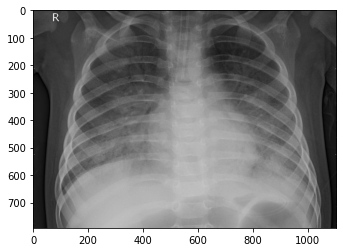

In [16]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))
    
show_example(*dataset[0])


In [17]:
 for i in range(5): 
  image , label = dataset[i]
  print(image.shape,label)

torch.Size([3, 792, 1104]) 0
torch.Size([3, 1312, 1592]) 0
torch.Size([3, 1752, 1736]) 0
torch.Size([3, 1086, 1612]) 0
torch.Size([3, 912, 1328]) 0


Since the shape of the samples vary we will use the dataset as train_ds by resizing and reshaping it to (200 x 200  px). We will also use some other transformations like `RandomHorizontalFlip()` and `RandomGreyscale` so that each time we load the dataset the model sees slightely different image which allows the model to generalize better.


In [25]:
train_ds = ImageFolder(data_dir+'/train', 
                      transform=tt.Compose([tt.Resize(200),
                                            tt.CenterCrop(200) ,
                                            tt.RandomHorizontalFlip(),
                                            #tt.RandomRotation(10),
                                            tt.RandomGrayscale(),
                                            tt.ToTensor()
                                           ]))

test_ds = ImageFolder(data_dir+"/test",
                      transform=tt.Compose([tt.Resize((200,200)),tt.ToTensor()]))

In [26]:
img, label = train_ds[0]
print(img.shape, label)
print(len(train_ds))
img

torch.Size([3, 200, 200]) 0
2000


tensor([[[0.2549, 0.2392, 0.2353,  ..., 0.2392, 0.2510, 0.2471],
         [0.2353, 0.2549, 0.2510,  ..., 0.2588, 0.2549, 0.2039],
         [0.2000, 0.2353, 0.2549,  ..., 0.2549, 0.2078, 0.1804],
         ...,
         [0.6118, 0.6118, 0.6118,  ..., 0.5216, 0.5216, 0.5255],
         [0.5961, 0.6000, 0.6000,  ..., 0.5216, 0.5255, 0.5294],
         [0.5843, 0.5882, 0.5961,  ..., 0.5255, 0.5333, 0.5255]],

        [[0.2549, 0.2392, 0.2353,  ..., 0.2392, 0.2510, 0.2471],
         [0.2353, 0.2549, 0.2510,  ..., 0.2588, 0.2549, 0.2039],
         [0.2000, 0.2353, 0.2549,  ..., 0.2549, 0.2078, 0.1804],
         ...,
         [0.6118, 0.6118, 0.6118,  ..., 0.5216, 0.5216, 0.5255],
         [0.5961, 0.6000, 0.6000,  ..., 0.5216, 0.5255, 0.5294],
         [0.5843, 0.5882, 0.5961,  ..., 0.5255, 0.5333, 0.5255]],

        [[0.2549, 0.2392, 0.2353,  ..., 0.2392, 0.2510, 0.2471],
         [0.2353, 0.2549, 0.2510,  ..., 0.2588, 0.2549, 0.2039],
         [0.2000, 0.2353, 0.2549,  ..., 0.2549, 0.2078, 0.

In [27]:
img, label = test_ds[0]
print(img.shape, label)
print(len(test_ds))
img

torch.Size([3, 200, 200]) 0
328


tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0431, 0.0510, 0.1333],
         [0.0000, 0.0000, 0.0000,  ..., 0.0431, 0.0471, 0.1216],
         [0.0000, 0.0000, 0.0000,  ..., 0.0392, 0.0353, 0.0941],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0431, 0.0510, 0.1333],
         [0.0000, 0.0000, 0.0000,  ..., 0.0431, 0.0471, 0.1216],
         [0.0000, 0.0000, 0.0000,  ..., 0.0392, 0.0353, 0.0941],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0431, 0.0510, 0.1333],
         [0.0000, 0.0000, 0.0000,  ..., 0.0431, 0.0471, 0.1216],
         [0.0000, 0.0000, 0.0000,  ..., 0.0392, 0.0353, 0.

Label:  Covid Negative (0)


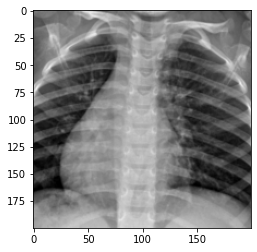

In [28]:
def show_example(img, label):
    print('Label: ', train_ds.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))
    
show_example(*train_ds[5])

In [ ]:
def show_example(img, label):
    print('Label: ', train_ds.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))
    
show_example(*train_ds[746])

Label:  Covid Positive (1)


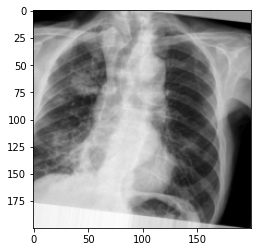

In [23]:
def show_example(img, label):
    print('Label: ', train_ds.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))
    
show_example(*train_ds[1746])

In [24]:
print(len(train_ds))

2000


Next, let's use the `random_split` helper function to set aside 20 percent of training data samples, i.e., 400 images as our validation set.


In [ ]:
val_size = 400
train_size = len(train_ds) - val_size

train_dataset, val_dataset = random_split(train_ds, [train_size, val_size])
len(train_dataset), len(val_dataset)


(1600, 400)

We can now create PyTorch data loaders for training and validation.

In [ ]:
batch_size = 32

train_dl = DataLoader(train_dataset, batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dl = DataLoader(val_dataset, batch_size*2, num_workers=2, pin_memory=True)


Now Let's see the a batch of train_dl. Each time the following code is run, we get a different bach, since the sampler shuffles the indices before creating batches.

In [ ]:
def show_batch(dl):
  for images, labels in dl:
    fig ,axs = plt.subplots(figsize=(8,8))
    axs.set_xticks([]);  axs.set_yticks([])
    axs.imshow(make_grid(images,nrow = 8).permute(1,2,0))
    break

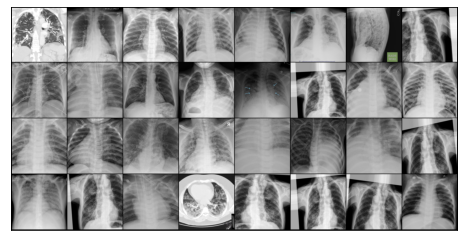

In [ ]:
show_batch(train_dl)

In [ ]:
project_name = "covid-19-x-ray-image-classification"

In [ ]:
import jovian
jovian.commit(project=project_name,environment=None)

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ai/navyasrikelam1/covid-19-x-ray-image-classification


'https://jovian.ai/navyasrikelam1/covid-19-x-ray-image-classification'

## **Defining the Model (Convolutional Neural Network)**

We will use a convolutional neural network, using the `nn.Conv2d` class from PyTorch. Convolutional layers offer certain advantages like 
* ### Fewer Parameters : 
A small set of parameters (kernel) is just enough to compute outputs of the entire image, therefore model has much fewer parameters as compared to fully connected layers.

* ### Sparsity of connections:
 In each layer, each output element only depends on a small number of input elements, which makes the forward and backward passes more efficient.

* ### Parameter sharing and spatial invariance: 
The features learned by a kernel in one part of the image can be used to detect similar pattern in a different part of another image. 

> We will also use a `max-pooling` layers to progressively decrease the height & width of the output tensors from each convolutional layer.

Let's define the model by extending an `ImageClassificationBase` class which contains helper methods for training & validation.




In [ ]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
class Cifar10CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 32 x 200 x 200

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 100 x 100

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 50 x 50

            nn.Flatten(), 
            nn.Linear(80000, 512),
            nn.ReLU(),
            nn.Linear(512, 64),
            nn.ReLU(),
            nn.Linear(64, 2))
        
    def forward(self, xb):
        return self.network(xb)

In [ ]:
model = Cifar10CnnModel()
model

Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=80000, out_features=512, bias=True)
    (17): ReLU()
    (18): Linear(in_features

Let's verify that the model produces the expected output on a batch of training data. That is it must produce 2 outputs for each image which can be interpreted as probabilities for each of 2 target classes.

In [ ]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([32, 3, 200, 200])
out.shape: torch.Size([32, 2])
out[0]: tensor([ 0.0454, -0.1049], grad_fn=<SelectBackward>)


To seamlessly use a GPU, if one is available, we define a couple of helper functions `(get_default_device & to_device)` and a helper class `DeviceDataLoader` to move our model & data to the GPU as required. 

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

We can now wrap our training and validation data loaders using `DeviceDataLoader` for automatically transferring batches of data to the GPU (if available), and use `to_device` to move our model to the GPU (if available).

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)
to_device(model, device);

We will now defiine two functions, `fit` and `evaluate` to train the model using gradient descent and evaluate it's performance on the validation dataset.

In [ ]:
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

Before we begin training, let's instantiate the model once again and see how it performs on the validation set with the initial set of parameters.

In [ ]:
model = to_device(Cifar10CnnModel(), device)

In [ ]:
evaluate(model, valid_dl)

{'val_acc': 0.4665178656578064, 'val_loss': 0.6938918828964233}

The initial accuracy is approximately 50 per, that means our model can predict correct labels for 5 images out of 10 images picked randomly.

Let's use the following hyper parameters (number of epocs, learning rate, batch size etc).

In [ ]:
num_epochs = 6
opt_func = torch.optim.Adam
lr = 10e-5 

In [ ]:
history = fit(num_epochs, lr, model, train_dl, valid_dl, opt_func)

Epoch [0], train_loss: 0.6626, val_loss: 0.5232, val_acc: 0.8058
Epoch [1], train_loss: 0.3562, val_loss: 0.2967, val_acc: 0.8929
Epoch [2], train_loss: 0.1859, val_loss: 0.1830, val_acc: 0.9308
Epoch [3], train_loss: 0.1222, val_loss: 0.1055, val_acc: 0.9531
Epoch [4], train_loss: 0.1177, val_loss: 0.2248, val_acc: 0.9174
Epoch [5], train_loss: 0.1134, val_loss: 0.0749, val_acc: 0.9688


In [ ]:
num_epochs1 = 5
lr1 = 10e-7

In [ ]:
history1 = fit(num_epochs1, lr1, model, train_dl, valid_dl, opt_func)

Epoch [0], train_loss: 0.0676, val_loss: 0.0738, val_acc: 0.9688
Epoch [1], train_loss: 0.0670, val_loss: 0.0725, val_acc: 0.9710
Epoch [2], train_loss: 0.0672, val_loss: 0.0715, val_acc: 0.9710
Epoch [3], train_loss: 0.0667, val_loss: 0.0715, val_acc: 0.9710
Epoch [4], train_loss: 0.0652, val_loss: 0.0705, val_acc: 0.9732


In [ ]:
jovian.reset()
jovian.log_hyperparams({
    'num_epochs': num_epochs+num_epochs1,
    'opt_func': opt_func.__name__,
    'batch_size': batch_size,
    'lr': lr,
    'lr1':lr1,
})

[jovian] Hyperparams logged.


In [ ]:
history_total = history + history1

In [ ]:
jovian.log_metrics(train_loss=history_total[-1]['train_loss'], 
                   val_loss=history_total[-1]['val_loss'], 
                   val_acc=history_total[-1]['val_acc'])

[jovian] Metrics logged.


Now let's plot validation accuracies to see how our model is improving.

In [ ]:
def plot_accuracies(history_total):
    accuracies = [x['val_acc'] for x in history_total]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

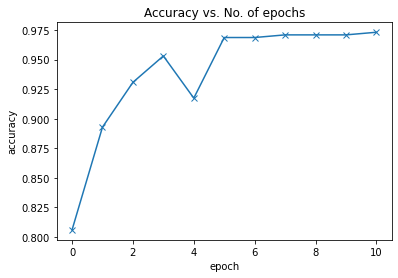

In [ ]:
plot_accuracies(history_total)

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

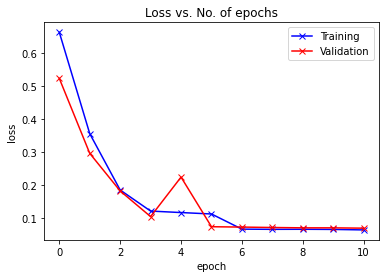

In [ ]:
plot_losses(history_total)

Looks like the model was well trained. By the end of 11 epochs the validation accuracy has reached upto 97.32 percentage and loss has fell to 0.07.

In [ ]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/navyasrikelam1/covid-19-x-ray-image-classification


'https://jovian.ai/navyasrikelam1/covid-19-x-ray-image-classification'

# **Testing with individual images**

While we have been tracking the overall accuracy of a model so far, it's also a good idea to look at model's results on some sample images. Let's test out our model with some images from the predefined test dataset of 328 images.


Let's define a helper function `predict_image`, which returns the predicted label for a single image tensor.

In [ ]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: Covid Negative , Predicted: Covid Negative


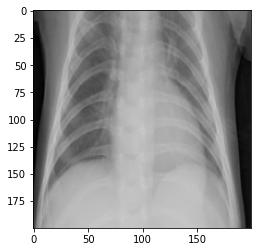

In [ ]:
img, label = test_ds[1]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [ ]:
len(test_ds)

328

Label: Covid Negative , Predicted: Covid Negative


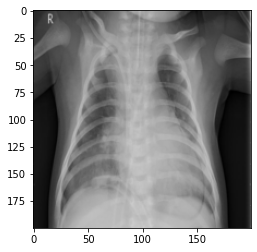

In [ ]:
img, label = test_ds[100]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: Covid Positive , Predicted: Covid Positive


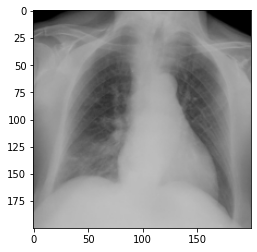

In [ ]:
img, label = test_ds[327]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: Covid Negative , Predicted: Covid Negative


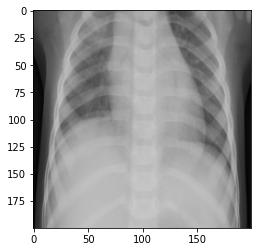

In [ ]:
img, label = test_ds[20]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [ ]:
test_loader = DeviceDataLoader(DataLoader(test_ds, batch_size*2), device)
result = evaluate(model, test_loader)
result

{'val_acc': 0.9505208134651184, 'val_loss': 0.1746668815612793}

In [ ]:
jovian.log_metrics(test_loss=result['val_loss'], test_acc=result['val_acc'])

[jovian] Metrics logged.


# Saving the model

In [ ]:
torch.save(model.state_dict(), 'cifar10-cnn.pth')

In [ ]:
model2 = to_device(Cifar10CnnModel(), device)

In [ ]:
model2.load_state_dict(torch.load('cifar10-cnn.pth'))

<All keys matched successfully>

In [ ]:
evaluate(model2, test_loader)

{'val_acc': 0.9505208134651184, 'val_loss': 0.1746668815612793}

In [ ]:
import jovian

In [ ]:
jovian.commit(project = project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/navyasrikelam1/covid-19-x-ray-image-classification


'https://jovian.ai/navyasrikelam1/covid-19-x-ray-image-classification'

# Testing a sample image.

> This image is the chest x-ray of a person who was tested covid negative.

Let's see whether the model makes true predictions or not. 

In [ ]:
sample_image_data_dir = '/a-sample-image'

In [ ]:
picture = ImageFolder(sample_image_data_dir,
                      transform=tt.Compose([tt.Resize((200,200)),tt.ToTensor()]))

In [ ]:
image , _ = picture[0]
print(image)
print(image.shape)

tensor([[[0.1294, 0.1255, 0.1412,  ..., 0.1412, 0.1333, 0.1294],
         [0.6392, 0.6471, 0.6588,  ..., 0.1412, 0.1451, 0.1373],
         [0.4196, 0.4196, 0.4157,  ..., 0.1255, 0.1294, 0.1294],
         ...,
         [0.4902, 0.5020, 0.5294,  ..., 0.6118, 0.6078, 0.5961],
         [0.4902, 0.5059, 0.5294,  ..., 0.6157, 0.6157, 0.6078],
         [0.4863, 0.5098, 0.5294,  ..., 0.6157, 0.6157, 0.6039]],

        [[0.1020, 0.1059, 0.1176,  ..., 0.1137, 0.1176, 0.1137],
         [0.6510, 0.6549, 0.6667,  ..., 0.1137, 0.1176, 0.1137],
         [0.4196, 0.4196, 0.4157,  ..., 0.1059, 0.1098, 0.1059],
         ...,
         [0.5137, 0.5294, 0.5569,  ..., 0.6392, 0.6353, 0.6275],
         [0.5098, 0.5333, 0.5569,  ..., 0.6471, 0.6431, 0.6314],
         [0.5059, 0.5333, 0.5569,  ..., 0.6471, 0.6431, 0.6314]],

        [[0.1294, 0.1255, 0.1412,  ..., 0.1098, 0.1059, 0.1059],
         [0.7098, 0.7098, 0.7176,  ..., 0.1020, 0.1059, 0.1020],
         [0.4353, 0.4353, 0.4235,  ..., 0.0941, 0.0980, 0.

Predicted: Covid Positive


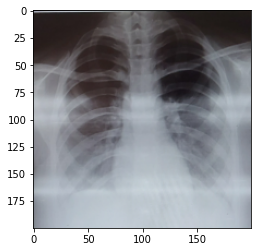

In [ ]:
plt.imshow(image.permute(1, 2, 0))
print('Predicted:', predict_image(image, model))

Now let's commit and save our work.

In [ ]:
jovian.commit(project = project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/navyasrikelam1/covid-19-x-ray-image-classification


'https://jovian.ai/navyasrikelam1/covid-19-x-ray-image-classification'